In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:39<00:00, 17.9MB/s]
100% 2.70G/2.70G [02:39<00:00, 18.2MB/s]


In [2]:
!unzip -q new-plant-diseases-dataset.zip

In [97]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [5]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,  # 64 images passed at once to our model
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[195.5  200.5  222.5 ]
   [199.5  204.5  226.5 ]
   [200.   205.   227.  ]
   ...
   [138.75 132.75 160.75]
   [120.25 114.25 142.25]
   [113.   107.   135.  ]]

  [[190.   195.   217.  ]
   [195.5  200.5  222.5 ]
   [201.75 206.75 228.75]
   ...
   [129.25 123.25 151.25]
   [143.5  137.5  165.5 ]
   [112.5  106.5  134.5 ]]

  [[193.75 198.75 220.75]
   [194.5  199.5  221.5 ]
   [199.25 204.25 226.25]
   ...
   [119.25 113.25 141.25]
   [123.75 117.75 145.75]
   [ 99.5   93.5  121.5 ]]

  ...

  [[146.   146.   172.  ]
   [153.   153.   179.  ]
   [144.25 144.25 170.25]
   ...
   [120.   115.   138.  ]
   [128.75 123.75 146.75]
   [112.   107.   130.  ]]

  [[143.75 143.75 169.75]
   [149.25 149.25 175.25]
   [140.75 140.75 166.75]
   ...
   [118.75 113.75 136.75]
   [108.   103.   126.  ]
   [120.25 115.25 138.25]]

  [[143.25 143.25 169.25]
   [145.   145.   171.  ]
   [145.25 145.25 171.25]
   ...
   [124.75 119.75 142.75]
   [116.25 111.25 134.25]
   [115.   110.   13

# **Building Model**

To avoid Overshooting
  1. Choose small learning rate (0.001 default, we could use 0.0001)
  2. For case of underfitting, increase number of neurons.
  3. Add more Convolution Layers to extract more features from image. There is apoosibility that model is unabe to capture relevant feature or model is cnfusing due to lack of features so feed more features.

In [41]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

Build Convolutional Layer

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same", activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same", activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same", activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same", activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same", activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25)) #Avoid overfitting

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
# Output Layer
model.add(Dense(units=38,activation='softmax')) #Softmax activation gives prob for each class


# **Compiling Model**


In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

#**Model Training**

In [55]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 133s 115ms/step - accuracy: 0.1471 - loss: 3.1476 - val_accuracy: 0.6614 - val_loss: 1.0827
Epoch 2/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 134s 112ms/step - accuracy: 0.6681 - loss: 1.0571 - val_accuracy: 0.7802 - val_loss: 0.6850
Epoch 3/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 133s 104ms/step - accuracy: 0.7953 - loss: 0.6334 - val_accuracy: 0.8232 - val_loss: 0.5469
Epoch 4/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 112s 102ms/step - accuracy: 0.8536 - loss: 0.4529 - val_accuracy: 0.8808 - val_loss: 0.3726
Epoch 5/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.8764 - loss: 0.3840 - val_accuracy: 0.8932 - val_loss: 0.3374
Epoch 6/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 150s 111ms/step - accuracy: 0.8945 - loss: 0.3182 - val_accuracy: 0.8785 - val_loss: 0.3798
Epoch 7/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 122s 111ms/step - accuracy: 0.9077 - loss: 0.2885 - val_accuracy: 0.9176 - val_loss: 0.2661
Epoch 8/10
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 135s 104ms/step - ac

#Model Evaluation

In [56]:
#Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.9581 - loss: 0.1354


In [57]:
print(train_loss,train_acc)

0.12066014111042023 0.961860716342926


In [58]:
#Model Evaluation on Validation Set
train_loss,train_acc = model.evaluate(validation_set)

275/275 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9211 - loss: 0.2711


#Saving Model

In [59]:
model.save('plant_disease_model.h5')

In [60]:
model.save('plant_disease_model.keras')

In [61]:
training_history.history

{'accuracy': [0.32480260729789734,
  0.7117433547973633,
  0.8162884712219238,
  0.8622092604637146,
  0.8839746713638306,
  0.8973326683044434,
  0.9104630351066589,
  0.9114446043968201,
  0.914745032787323,
  0.9195960164070129],
 'loss': [2.3741331100463867,
  0.9146929979324341,
  0.5698264837265015,
  0.4231092929840088,
  0.3592817783355713,
  0.311386376619339,
  0.2794623076915741,
  0.2748388946056366,
  0.26334333419799805,
  0.24972385168075562],
 'val_accuracy': [0.6613931059837341,
  0.7802185416221619,
  0.823184609413147,
  0.8808331489562988,
  0.8932392597198486,
  0.8784998655319214,
  0.917596161365509,
  0.9103687405586243,
  0.8928977847099304,
  0.9181652665138245],
 'val_loss': [1.0826956033706665,
  0.6850012540817261,
  0.5469431281089783,
  0.372639924287796,
  0.33740290999412537,
  0.3797537684440613,
  0.26613348722457886,
  0.29505324363708496,
  0.34719038009643555,
  0.27690038084983826]}

Recording History

In [62]:
#record history in json format
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

#Accuracy Visualization

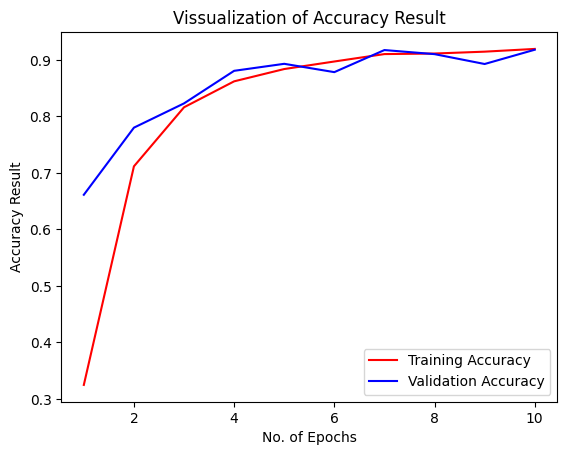

In [63]:
epochs = list(range(1,11)) # Change epochs to a list
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Vissualization of Accuracy Result')
plt.legend()
plt.show()

# Some Other Metrics for Model Evaluation

In [64]:
class_name = validation_set.class_names
# class_name ##type earlier command to show all available classes in our validation_set

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=64,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [66]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

275/275 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step


(array([[9.99853134e-01, 1.26689163e-04, 2.21586222e-10, ...,
         3.75656240e-21, 1.49545446e-14, 8.93382082e-15],
        [9.99992967e-01, 4.10957242e-08, 4.17043067e-11, ...,
         6.40780901e-16, 1.17388933e-12, 1.47034956e-12],
        [1.00000000e+00, 2.15148063e-13, 2.94413907e-12, ...,
         7.49827024e-28, 2.64790731e-16, 3.97767621e-14],
        ...,
        [5.49981102e-11, 1.89316924e-22, 6.33085945e-11, ...,
         9.97448177e-14, 8.90150961e-17, 9.99999762e-01],
        [3.27513415e-16, 7.54162851e-32, 4.64018942e-16, ...,
         1.03438435e-14, 1.63960233e-22, 1.00000000e+00],
        [6.31353442e-11, 2.04518498e-12, 1.88763883e-11, ...,
         8.13437429e-10, 6.40415806e-07, 9.95332420e-01]], dtype=float32),
 (17572, 38))

In [67]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [68]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

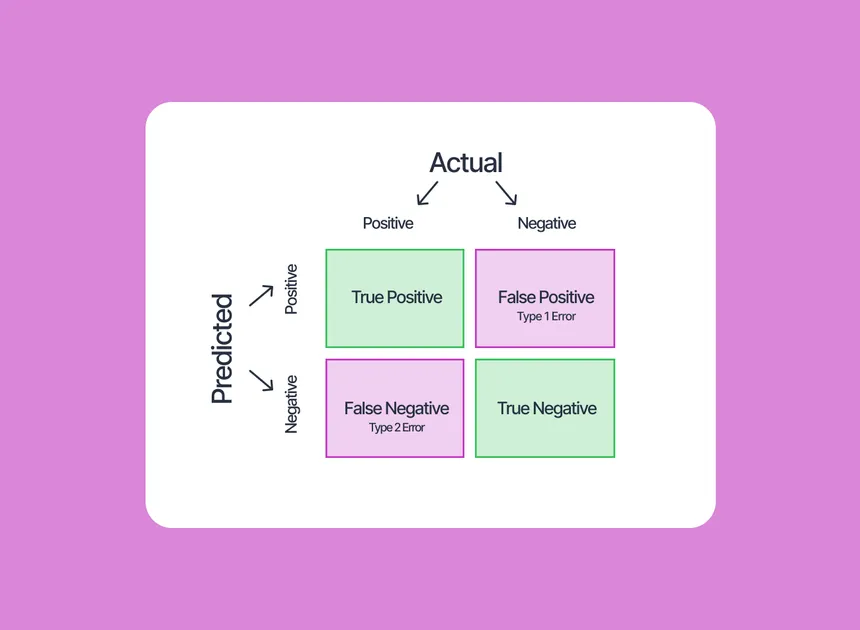

Recall = TP/(TP+FN)\
Accuracy = (TP+TN)/(TP+TN+FP+FN)\
Precesion = TP / (TP + FP)\
F1 Score = (2 * Precesion * Recall)/(Precesion + Recall)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.82      0.93      0.87       504
                                 Apple___Black_rot       0.97      0.95      0.96       497
                          Apple___Cedar_apple_rust       0.95      0.89      0.92       440
                                   Apple___healthy       0.91      0.90      0.90       502
                               Blueberry___healthy       0.90      0.94      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.87      0.93       421
                 Cherry_(including_sour)___healthy       0.97      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.84      0.89       410
                       Corn_(maize)___Common_rust_       0.95      0.99      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.95      0.

In [75]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

#Confusion Matrix visualization



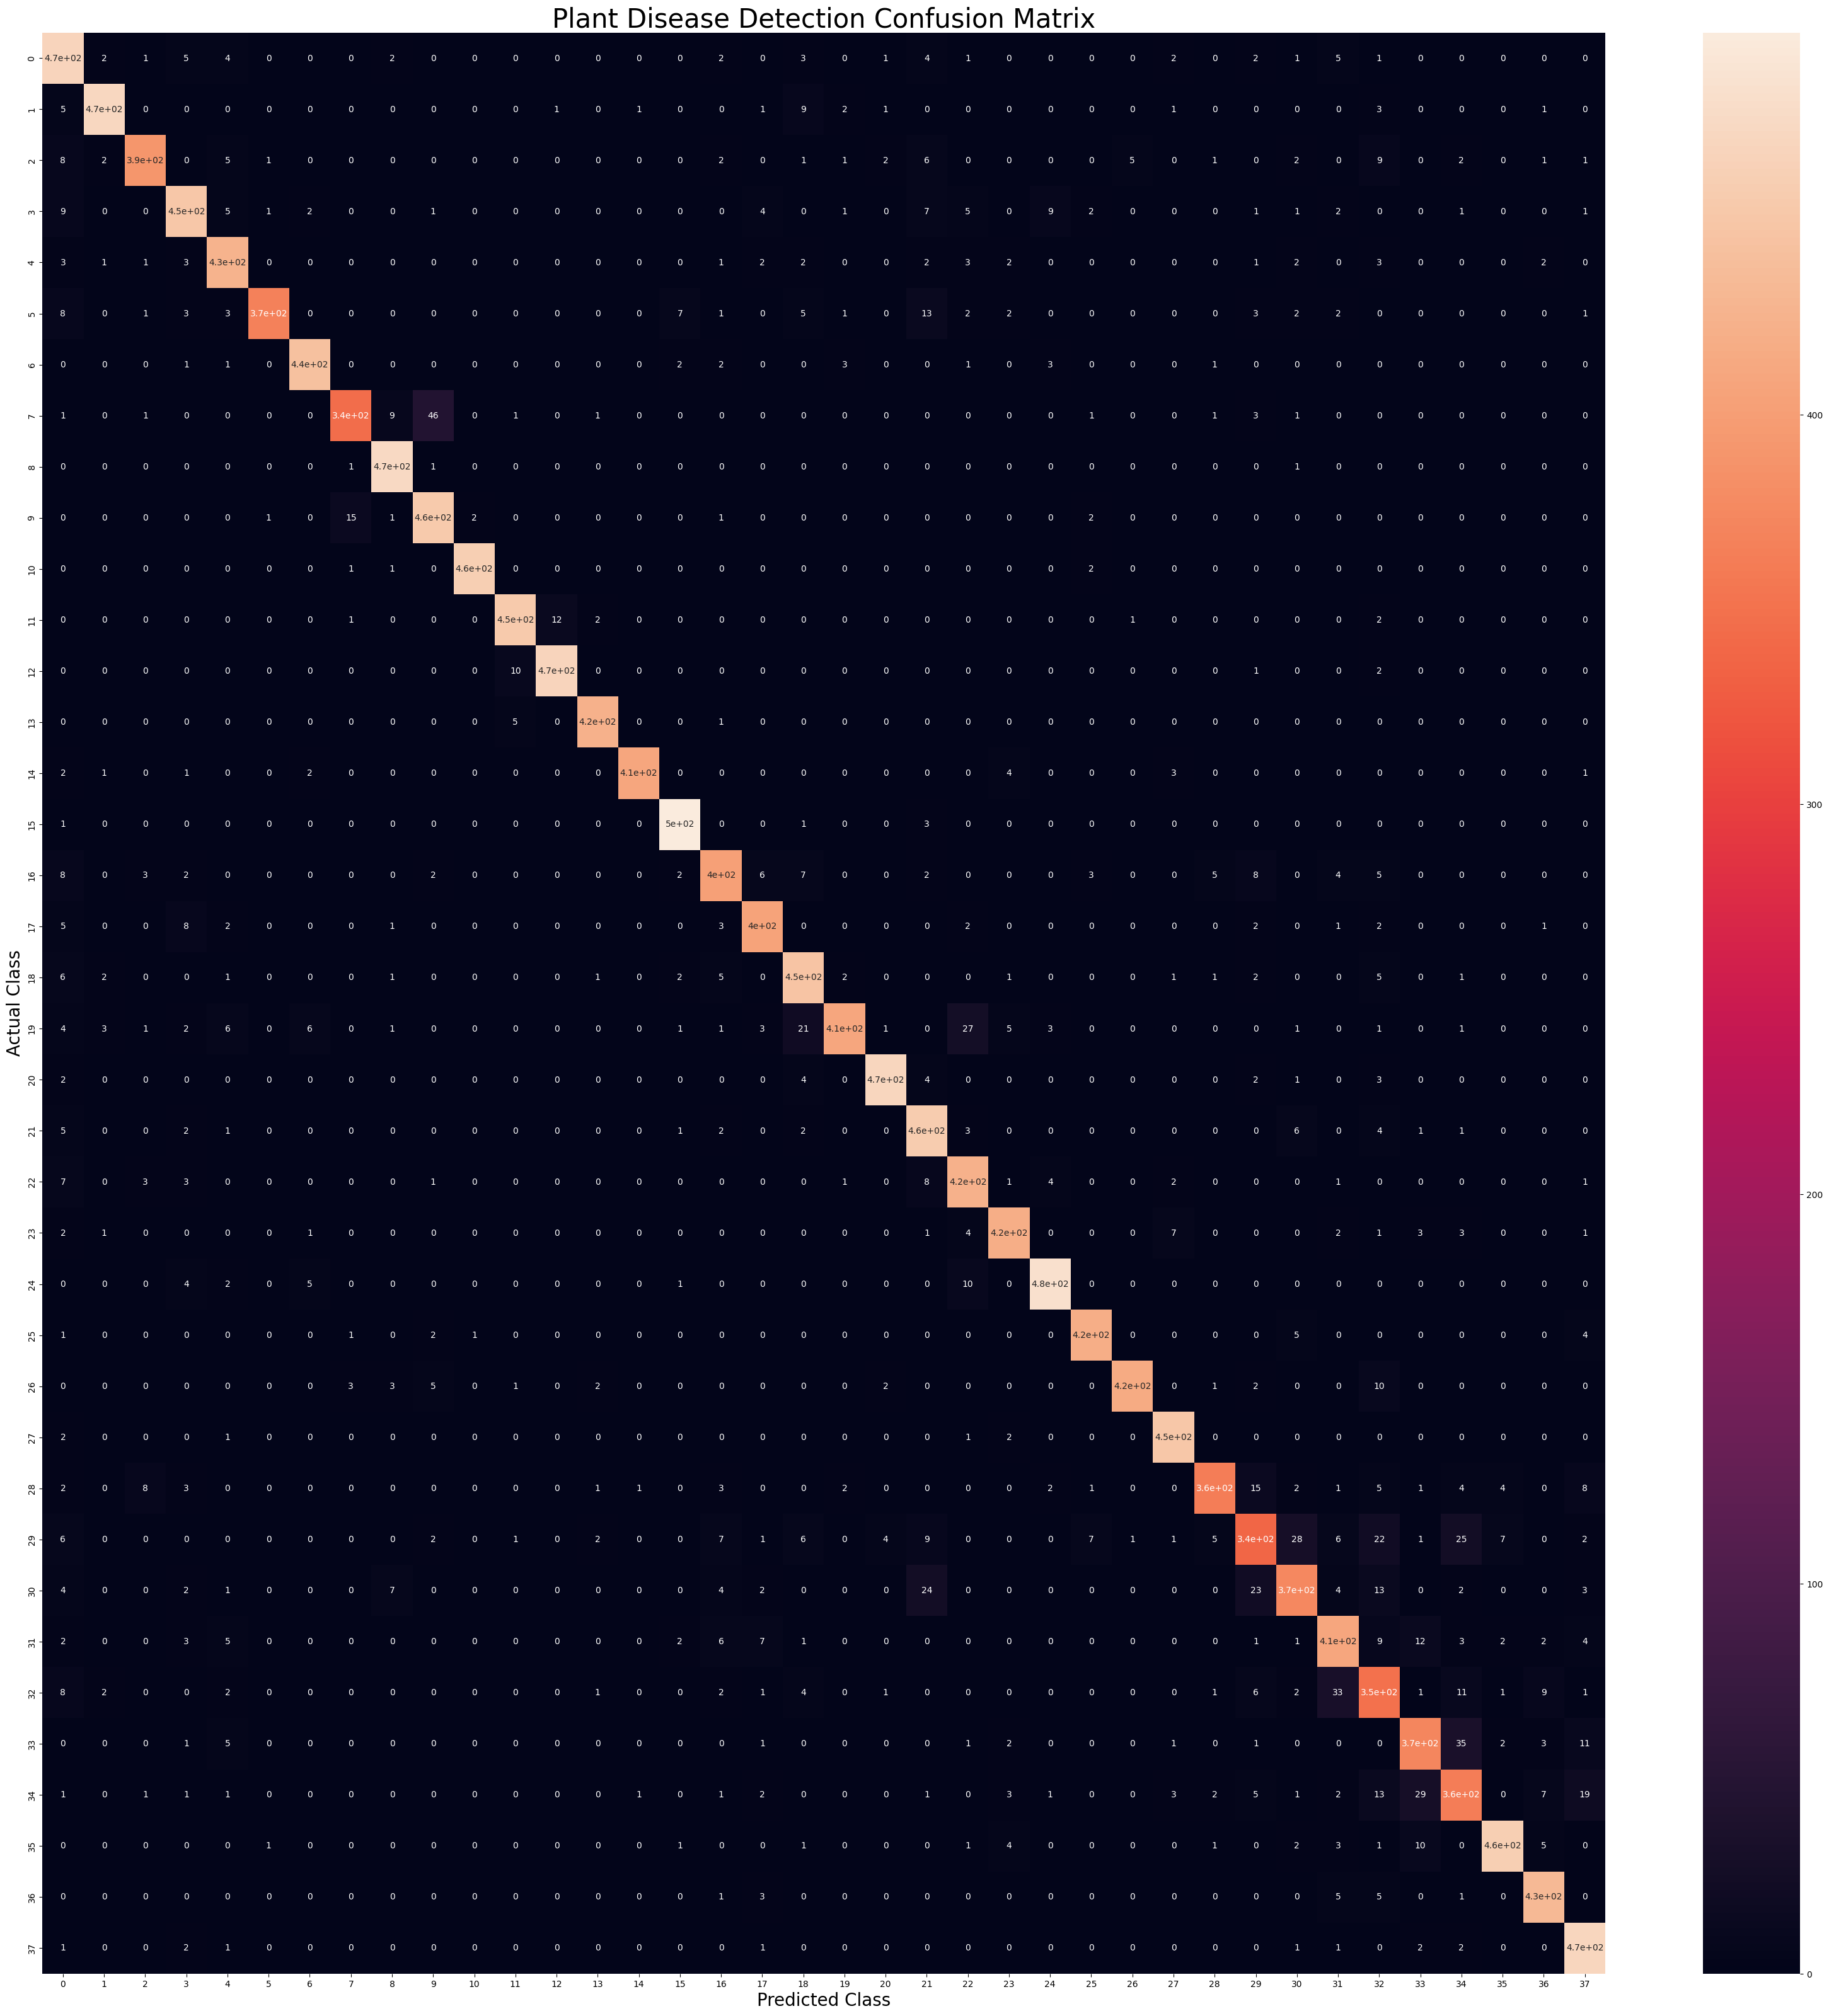

In [87]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Plant Disease Detection Confusion Matrix',fontsize=30)
plt.show()

In [88]:
import cv2
img_path = '/content/test/test/AppleCedarRust1.JPG'

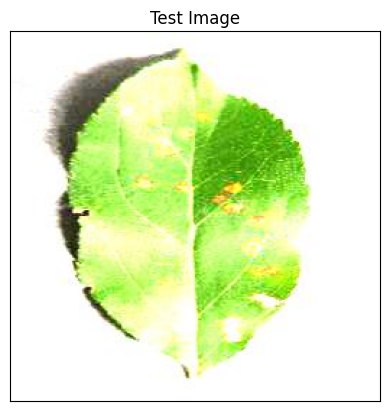

In [94]:
#Reading Image
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB image

#Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [98]:
img = tf.keras.preprocessing.image.load_img(img_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])   #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [103]:
predictions = model.predict(input_arr)
predictions,predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(array([[5.5859905e-02, 2.6455466e-02, 6.9364768e-01, 3.5776666e-04,
         1.7509446e-01, 7.4095454e-04, 1.9093583e-05, 1.1489620e-03,
         1.0068970e-03, 7.4200878e-05, 4.0516070e-06, 5.5339970e-05,
         1.3438864e-04, 3.9823713e-05, 1.9640279e-04, 5.1777795e-05,
         2.3508477e-03, 2.4185641e-04, 4.6674451e-03, 1.3991917e-03,
         1.4469582e-03, 2.4381098e-03, 3.2525714e-03, 1.9664869e-04,
         6.6539571e-05, 4.2568270e-05, 1.8224857e-03, 3.0649286e-03,
         9.5111041e-05, 2.4318502e-04, 3.0081280e-04, 6.7501329e-04,
         9.9904118e-03, 5.9047121e-05, 1.0759004e-02, 2.2865326e-05,
         1.6043853e-03, 3.7278948e-04]], dtype=float32),
 (1, 38))

In [102]:
result_index = np.argmax(predictions)
result_index

2

In [104]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

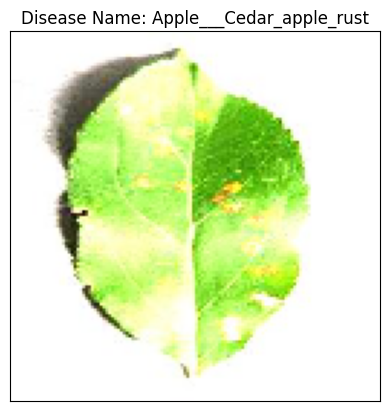

In [108]:
# Display result
model_prediction = class_name[result_index]
#Display Prediction Image
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()